- RandGridDistortiond (Less prob)
- Rand3DElasticd
- RandRotate90d
- RandFlipd
- RandRotated
- RandZoomd
- CropForegroundd (Change_size)

- RandGaussianNoised
- ShiftIntensityd
- RandShiftIntensityd
- RandKSpaceSpikeNoised

- KeepLargestConnectedComponentd

- OneOf

In [111]:
import torch
import monai
from monai.utils import first, set_determinism
from monai.transforms import (
    AsDiscrete,
    AsDiscreted,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    SaveImaged,
    ScaleIntensityRanged,
    Spacingd, 
    EnsureTyped,
    EnsureType,
    Invertd,
    RandGridDistortiond,
    Rand3DElasticd,
    RandRotate90d,
    RandFlipd,
    RandRotated,
    RandZoomd,
    CropForegroundd,
    RandGaussianNoised,
    ShiftIntensityd,
    RandShiftIntensityd,
    RandKSpaceSpikeNoised,
    KeepLargestConnectedComponentd,
    OneOf
)

from monai.data import DataLoader, Dataset
from monai.config import print_config
from monai.apps import download_and_extract
from monai.visualize import blend_images, matshow3d, plot_2d_or_3d_image
import tempfile
import shutil
import os
import glob
import matplotlib.pyplot as plt
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.metrics import DiceMetric
from monai.losses import DiceLoss
from monai.inferers import sliding_window_inference
from monai.data import CacheDataset, DataLoader, Dataset, decollate_batch
from monai.config import print_config
from monai.apps import download_and_extract
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import nibabel as nib
import numpy as np
from tqdm.notebook import tqdm

In [112]:
import numpy as np

In [113]:
root_dir = "/scratch/scratch6/akansh12/Parse_data/train/train/"
train_images = sorted(glob.glob(os.path.join(root_dir, "*", 'image', "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(root_dir, "*", 'label', "*.nii.gz")))

data_dicts = [{"images": images_name, "labels": label_name} for images_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-9], data_dicts[-9:]

In [108]:
train_transforms = Compose(
    [
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        ),
     CropForegroundd(keys=['images', 'labels'], source_key="images"),
     RandCropByPosNegLabeld(
            keys=['images', 'labels'],
            label_key="labels",
            spatial_size=(96, 96, 96),
            pos=1,
            neg=1,
            num_samples=4,
            image_key="images",
            image_threshold=0,
        ),
     EnsureTyped(keys=['images', 'labels']),     
          
    ]
)

### Original

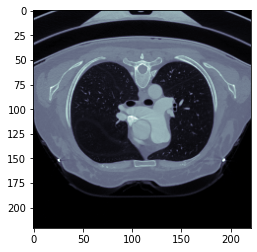

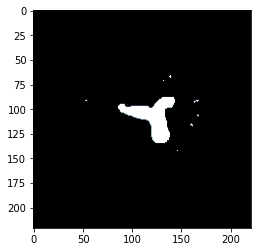

In [84]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        )])
img_orig = A(train_files[0])

plt.imshow(np.rot90(img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow(np.rot90(img_orig['labels'][0][:,:,80]), cmap = "bone")
plt.show()

### CropForegroundd

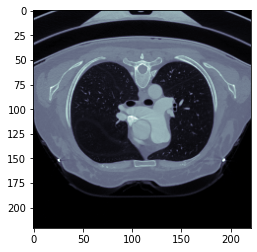

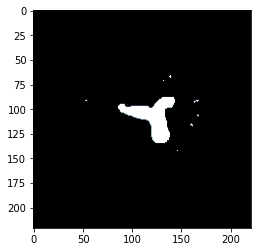

In [85]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        ),
    CropForegroundd(keys=['images', 'labels'], source_key="images")])
img_orig = A(train_files[0])

plt.imshow(np.rot90(img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow(np.rot90(img_orig['labels'][0][:,:,80]), cmap = "bone")
plt.show()


### Gaussian Noise

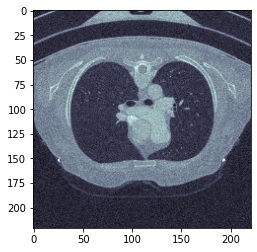

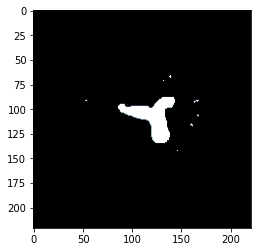

In [87]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        ),
RandGaussianNoised(keys=['images'], prob = 1),])

img_orig = A(train_files[0])

plt.imshow(np.rot90(img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow(np.rot90(img_orig['labels'][0][:,:,80]), cmap = "bone")
plt.show()

### RandGridDistortiond

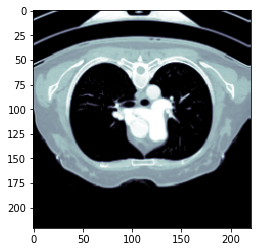

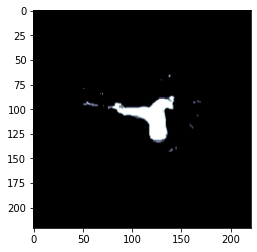

In [94]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-700, a_max=300,
            b_min=0.0, b_max=1.0, clip=True,
        ),
RandGridDistortiond(keys=['images', 'labels'], prob = 1),])

img_orig = A(train_files[0])

plt.imshow(np.rot90(img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow(np.rot90(img_orig['labels'][0][:,:,80]), cmap = "bone")
plt.show()

### RandRotate90d

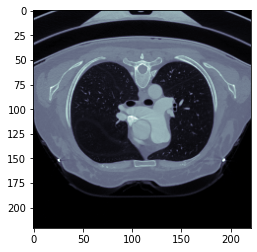

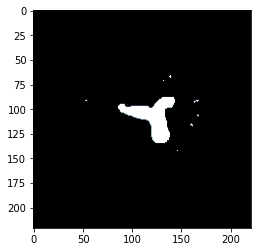

In [95]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        ),
RandRotate90d(keys=['images', 'labels'], prob = 1),])

img_orig = A(train_files[0])

plt.imshow((img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow((img_orig['labels'][0][:,:,80]), cmap = "bone")
plt.show()

### RandFlipd

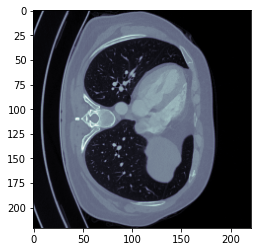

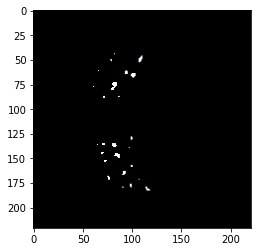

In [97]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        ),
RandFlipd(keys=['images', 'labels'], prob = 1),])

img_orig = A(train_files[0])

plt.imshow((img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow((img_orig['labels'][0][:,:,80]), cmap = "bone")
plt.show()

### RandZoomd

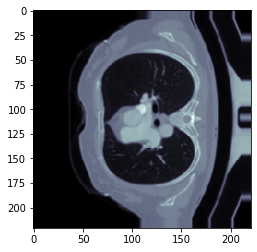

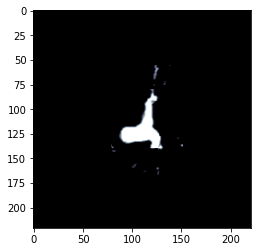

In [98]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        ),
RandZoomd(keys=['images', 'labels'], prob = 1),])

img_orig = A(train_files[0])

plt.imshow((img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow((img_orig['labels'][0][:,:,80]), cmap = "bone")
plt.show()

### RandShiftIntensityd

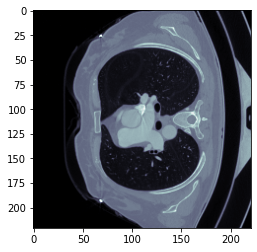

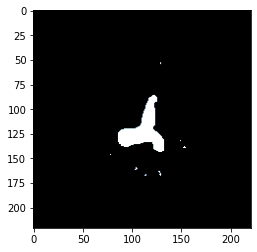

In [100]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        ),
RandShiftIntensityd(keys=['images', 'labels'],offsets=(10,20), prob = 1),])

img_orig = A(train_files[0])

plt.imshow((img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow((img_orig['labels'][0][:,:,80]), cmap = "bone")
plt.show()

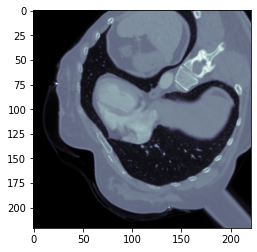

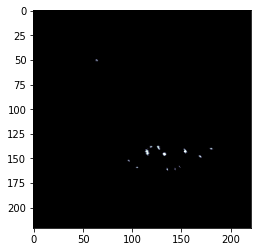

In [114]:
A = Compose([
     LoadImaged(keys=['images', 'labels']),
     EnsureChannelFirstd(keys = ["images", "labels"]),
     Orientationd(keys=['images', 'labels'], axcodes = 'LPS'),
     Spacingd(keys=['images', 'labels'], pixdim = (1.5,1.5,2), mode = ("bilinear", 'nearest')),
     ScaleIntensityRanged(
            keys=["images"], a_min=-1000, a_max=1000,
            b_min=0.0, b_max=1.0, clip=True,
        ),
RandRotated(keys=['images', 'labels'], prob = 1, range_x = (-10,10), range_y = (-10,10), range_z = (-10,10))])

img_orig = A(train_files[0])

plt.imshow((img_orig['images'][0][:,:,80]), cmap = "bone")
plt.show()
plt.imshow((img_orig['labels'][0][:,:,80]), cmap = "bone")